Plano de hoje
-------------

1. Ambiente de programação
2. Usando o computador para calcular    
3. Usando o computador para desenhar
    1. Traçando secantes e tangentes (derivadas)
    1. Animações e aproximações: algoritmo de secantes para achar zeros _vs_ Newton
    1. **Funções de $\mathbf{R}^2$ em $\mathbf{R}$: planos secantes e tangentes**

# Derivada em dimensão superior

Antes de pensar (muito) sobre como generalizar a derivada para $\mathbf{R}^2$,
vamos generalizar a idéia de _reta secante convergindo para a reta tangente_.
Para funções de $\mathbf{R}$ em $\mathbf{R}$, a secante era uma reta unindo dois pontos.
Porquê?
Porque dois pontos determinam uma reta.

Para funções de $\mathbf{R}^2$ em $\mathbf{R}$, o gráfico está em $\mathbf{R}^3$,
e podemos ter dois tipos de secantes.
Uma, simplesmente a **reta secante**, passando por dois pontos do gráfico.
A outra, será o **plano secante**.
Ora, se para definirmos uma reta precisamos de dois pontos, para definir um plano, precisamos de três.
Mas não bastam três quaisquer, pois se estes estivessem alinhados, eles não definiriam um plano.

## Qual secante escolher?

Se quisermos uma secante que nos dê uma **aproximação** da função,
o mais razoável será escolher o plano secante,
pois ele define uma aproximação para _qualquer_ ponto $(x,y)$ de $\mathbf{R}^2$.
Assim, vamos definir secantes passando por **três pontos** do gráfico.

## Como determinar a equação deste plano?

Temos três pontos, $(x_i, y_i, f(x_i, y_i))$.
Se eles determinam um plano dado pela equação $a\cdot x + b\cdot y + c\cdot z = d$,
devemos achar os coeficientes $a$, $b$, $c$ e $d$.

Além disso, sabemos que os pontos estão num gráfico, então podemos escrever a equação do plano como
$$ z = Ax + By + C. $$
Esta nova forma é melhor neste caso porque temos três incógnitas e três variáveis.
Assim, substituindo os valores de $x_i$, $y_i$ e $z_i = f(x_i, y_i)$ obtemos um sistema $3 \times 3$,
cuja solução serão os valores de $A$, $B$ e $C$.

In [91]:
def secante(f, x, y):
    """ Retorna uma função que descreve o plano secante passando pelos três pontos $(x_i, f(x_i))$.
        Os pontos $x_i$ e $y_i$ são dados por vetores de 3 posições
    """
    M = array([x,y,[1,1,1]]).T
    b = [f(xi, yi) for (xi,yi) in zip(x,y)]
    A,B,C = solve(M,b)
    def plano(x,y):
        return A*x + B*y + C
    return plano

In [110]:
def f(x,y):
    return x*x + y*y

In [113]:
points = [(2,0), (-2,0), (0,2)]
xpts = array([x for (x,y) in points])
ypts = array([y for (x,y) in points])
s = secante(f, xpts, ypts)

In [114]:
x = arange(-2,2,0.15)
y = arange(-2,2,0.15)
X,Y = meshgrid(x,y)

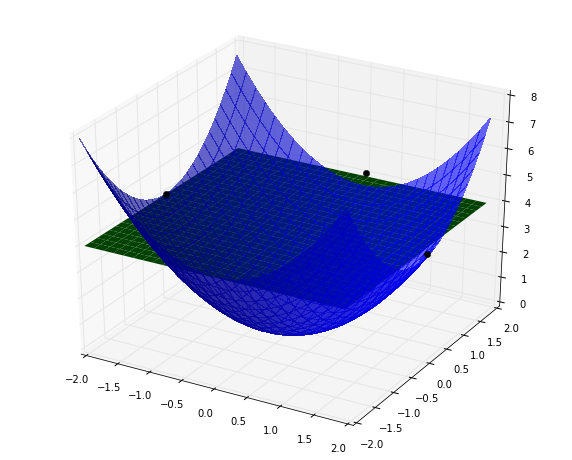

In [119]:
from mpl_toolkits.mplot3d import Axes3D
fig  = figure(figsize=(10,8))
ax   = fig.gca(projection='3d')
ax.plot3D(xpts, ypts, f(xpts, ypts), 'ko')

surf = ax.plot_surface(X,Y,f(X,Y), rstride=1, cstride=1, linewidth=0, antialiased=False, color='blue', alpha=0.6)

ax.plot_surface(X,Y,s(X,Y), rstride=1, cstride=1, linewidth=0, color='green')

# Convergindo para o plano tangente

Para obter o plano tangente em um ponto, devemos fazer os três pontos que escolhemos convergirem para um ponto escolhido $x$.
Como já vimos no caso da reta secante, existem várias maneiras de fazê-lo,
por exemplo mantendo um dos pontos fixos, ou então mantendo o baricentro constante e diminuindo o diâmetro.

Além disso, em dimensão dois temos _muito_ mais opções.
Por exemplo, podemos sempre usar um triângulo retângulo com ângulo reto no ponto fixo,
o que dá, por exemplo, $x$, $x + (h,0)$ e $x + (0,h)$, com $h \to 0$.
Poderíamos também usar $x$, $x + (h,h)$, $x + (h, -h)$.

Explorando a outra possibilidade, podemos tomar triângulos equiláteros centrados em $x$ e com lado $h$
(as contas são mais feias aqui).
Ou usar $x + (h,h)$, $x + (-h,h)$, $x + (0,-2h)$.
Qual destas será melhor?

## Definindo a derivada

Se vamos tomar o plano tangente como limite dos planos secantes,
uma boa idéia seria que este _não_ dependesse de _como_ os planos secantes convergem para o plano tangente.
Daí, a definição será dada por uma estimativa do plano tangente,
análoga à da derivada de uma função real:
$$ f(x + h) = t_x(h) + o(h),$$
onde $h = (h_x, h_y)$ e $t_x(h)$ corresponde ao ponto $x+h$ no plano tangente a $x$.

Como o plano tangente é dado por uma equação _afim_ $t_x(h) = Ah_x + Bh_y + C$,
e quando $h=(0,0)$ ele passa por $x$, temos $C = f(x)$.
Assim, resta apenas uma parte **linear** em $h$, que é dada por $Ah_x + Bh_y$.
Se notarmos $f'(x) = (A,B)$, temos enfim
$$ f(x + h) = f(x) + f'(x)\cdot h + o(h),$$
que é _exatamente_ a fórmula da derivada em dimensão um.
O que muda nesta fórmula é o _sentido_ que vamos dar à expressão "$f'(x)\cdot h$".
No caso real, $f'(x)$ e $h$ eram números reais, e o seu produto era óbvio.
Agora, temos dois vetores, e o seu "produto" será o produto escalar.

Na verdade, o que está realmente por trás disso é uma transformação afim,
que corresponde à equação da tangente por uma constante (o $f(x)$) e uma parte linear, que é $f'(x)$.

Podemos provar que, com esta definição, quando a derivada existir
(ou seja, existir uma transformação linear dada por $h \mapsto f'(x)\cdot h$,
tal que $f(x+h) = f(x) + f'(x)\cdot h + o(h)$)
ela não depende de como os planos secantes convergem para o ponto de tangência,
conquanto _todos_ os três pontos se aproximem deste.
(ou seja, não basta que a área do triângulo tenda a zero,
é preciso também que o seu perímetro / diâmetro tenda a zero).

## Análise de erro

Enfim, voltemos à análise numérica, estimando o erro que fazemos ao tomar três pontos e o plano secante que passa por eles.
Vamos seguir um caminho análogo ao que fizemos em dimensão um:
primeiro, o caso "simples" de um ponto fixo e os outros (dois) variáveis,
em seguida, o caso "centrado".

### Caso fixo, função com uma derivada

Aqui, usando nosso conhecimento sobre as secantes,
poderemos apenas mostrar que realmente o método converge.
Para estimativas do erro, devemos aguardar mais hipóteses (duas derivadas!).

Para simplificar a notação, tomaremos $x = 0$.
Para simplificar as contas, veremos o caso especial em que somamos em cada um dos eixos coordenados um deslocamento $h$.
Isto permite calcular aproximações de $A$ e $B$ independentemente:
$$ A_h = \frac{f(x + (h,0)) - f(x)}{h} $$
$$ B_h = \frac{f(x + (0,h)) - f(x)}{h} $$

Como a função tem uma derivada $(A,B)$, a diferença entre $(A_h, B_h)$ e esta tende a zero quando $h$ tende a zero:
este é o significado do $o(h)$.

### Caso fixo, função duas vezes derivável

Retomando os cálculos da parte passada, temos uma melhor estimativa para o erro,
pois podemos escrever $$o(h) = \frac{f''(x)\cdot (h,h)}{2} + o(h^2)$$
e portanto o erro em cada um de $A_h$ e $B_h$ será essencialmente $\frac{f''(x)}{2} h$.
Ou seja, assim como em dimensão um, uma função duas vezes derivável terá a derivada estimada
com um erro "do tamanho do passo" (corrigido pela derivada segunda).

### Caso baricêntrico

Enfim, vejamos o que acontece no caso onde os três pontos estão em um triângulo equilátero
centrado em $x = (0,0)$.
Os três pontos que vamos escolher serão notados $p$, $q$ e $r$,
e a equação do seu baricentro é $p + q + r = 3x = (0,0)$.
Vejamos a equação do plano que passa por estes três pontos.